# Data Analysis Project
### Fall 2023
## Analyzing Insurance Auto Claims

<br>
<br>
<p align="center">
<img 
  src="./files/car_accident.png" 
  alt="Car Accident" 
  width="800"
  height="650"
/>
</p>

<br>

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [43]:
# Load data
library(tidyverse)

claims_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

In [44]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


## Exploratory Data Analysis (80 Points)

Executives at this company have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

You must think of **at least 8 relevant questions** that will provide evidence for your recommendations.

The goal of your analysis should be discovering which variables drive the differences between customers with large lifetime values and customers who cost the company more than they provide in revenue through monthly premiums.

Some of the many questions you can explore include:

- Are there types of customers, based on their policy or demographics, that are highly profitable?
- Do certain policies have a lower number of claims, leading to large profits?
- Are there "problem customers" which have a large number of claims?

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 5 plots and 4 summary data frames for the exploratory data analysis section. Among the plots you produce, you must have at least 4 different types (ex. box plot, bar chart,
histogram, heat map, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

**Is there a relationship between employees leaving the company and their current salary?**

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:
Are there types of customers, based on their policy or demographics, that are highly profitable?

**Answer**:
Yes, based on the class of the customers, we can determine who are profitable and who might not be, by using the customer_lifetime_value and converting them into standardized string values of profit and loss. Among all the customers, based on the policies taken here we see that the customers who have taken the corporate policy seem to be highly profitable than the other policy with 66.2% where as others: Personal at 64.2% & Special at 63.1% profitability.

## Supporting Analysis

In [45]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

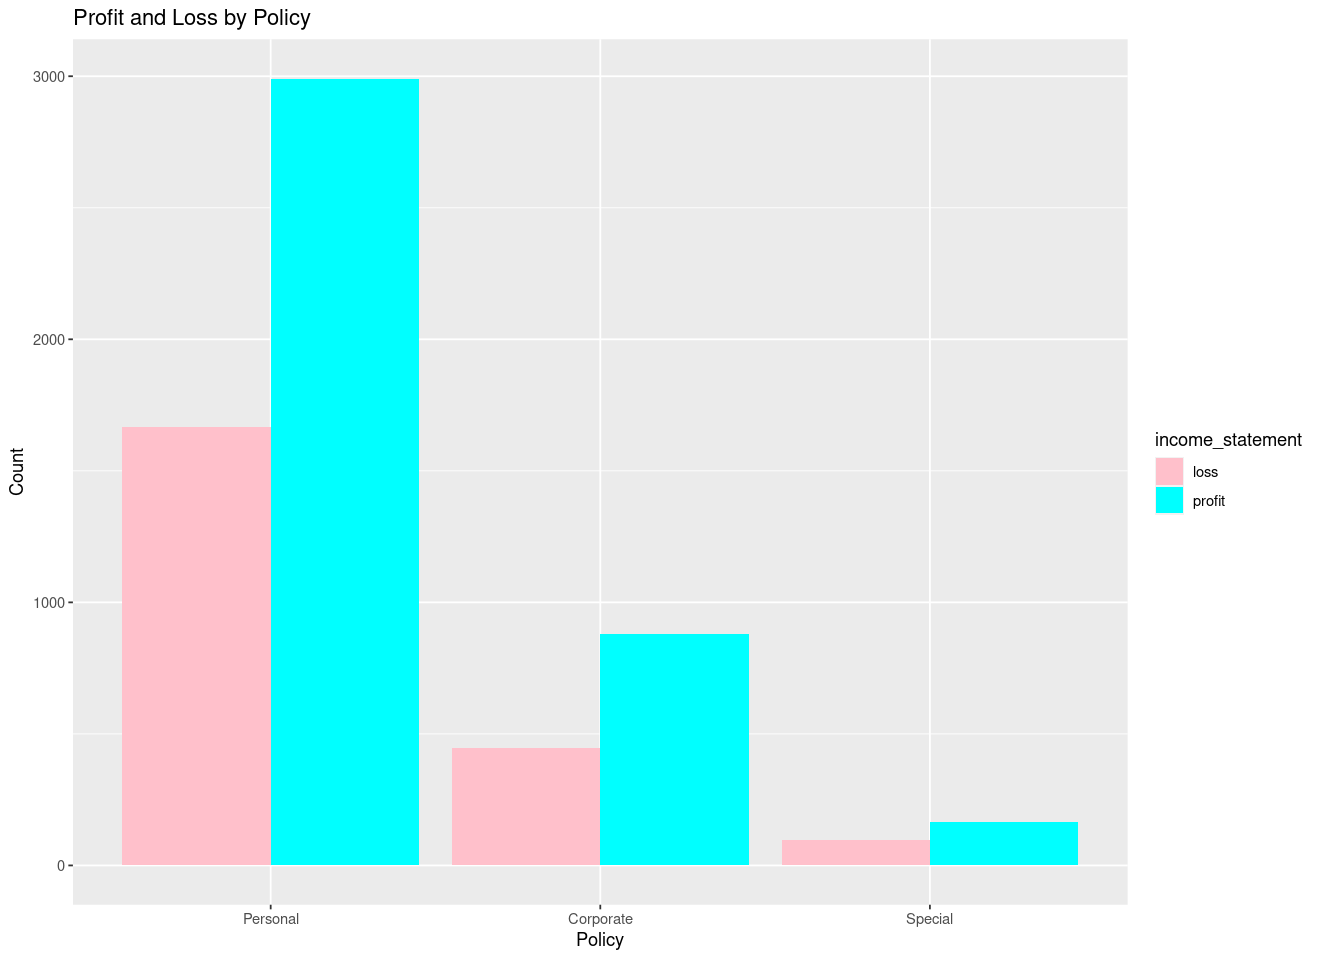

In [46]:
library(dplyr)
library(ggplot2)
library(tidyverse)

claims_df <- claims_df %>%
  mutate(income_statement = ifelse(claims_df$customer_lifetime_value > 0, "Profit", "Loss"))

profit_by_policy <- claims_df %>%
                    group_by(policy) %>%
                    summarize(total_count_profit = sum(income_statement == 'Profit'),
							 loss_customers = sum(income_statement == 'Loss'))

# Plotting
profit_by_policy_long <- pivot_longer(profit_by_policy, cols = c(loss_customers, total_count_profit),
                                      names_to = "income_statement", values_to = "Count")

ggplot(data = profit_by_policy_long, aes(x = policy, y = Count, fill = income_statement)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Profit and Loss by Policy",
       x = "Policy",
       y = "Count") +
  scale_fill_manual(values = c("pink", "cyan"), labels = c("loss", "profit"))

## Question 2


**Question**:
Do certain policies have a lower number of claims, leading to large profits?


**Answer**:
Based on the policies taken by the customers, it clearly sates that customers who have taken the personal policy have the highest profitability compared to otheres. Based on the total claims and total revenue generated by each claim we can easily determine that all the policies have the same amount of profitability but customers who have taken Special policy have lower claims as compared to others which is just 640 claims as compared to others with personal - 11131 and Corporate - 3175. But has a higher profit percentage of nearly 60.74%.

## Supporting Analysis


# A tibble: 3 × 6
  policy    total_claims_amount total_revenue total_claims profitability
  <fct>                   <dbl>         <dbl>        <dbl>         <dbl>
1 Personal             12768996      18085738        11131         1624.
2 Corporate             3649200       5178571         3175         1630.
3 Special                734441       1051710          640         1642.
# ℹ 1 more variable: profitability_percentage <dbl>


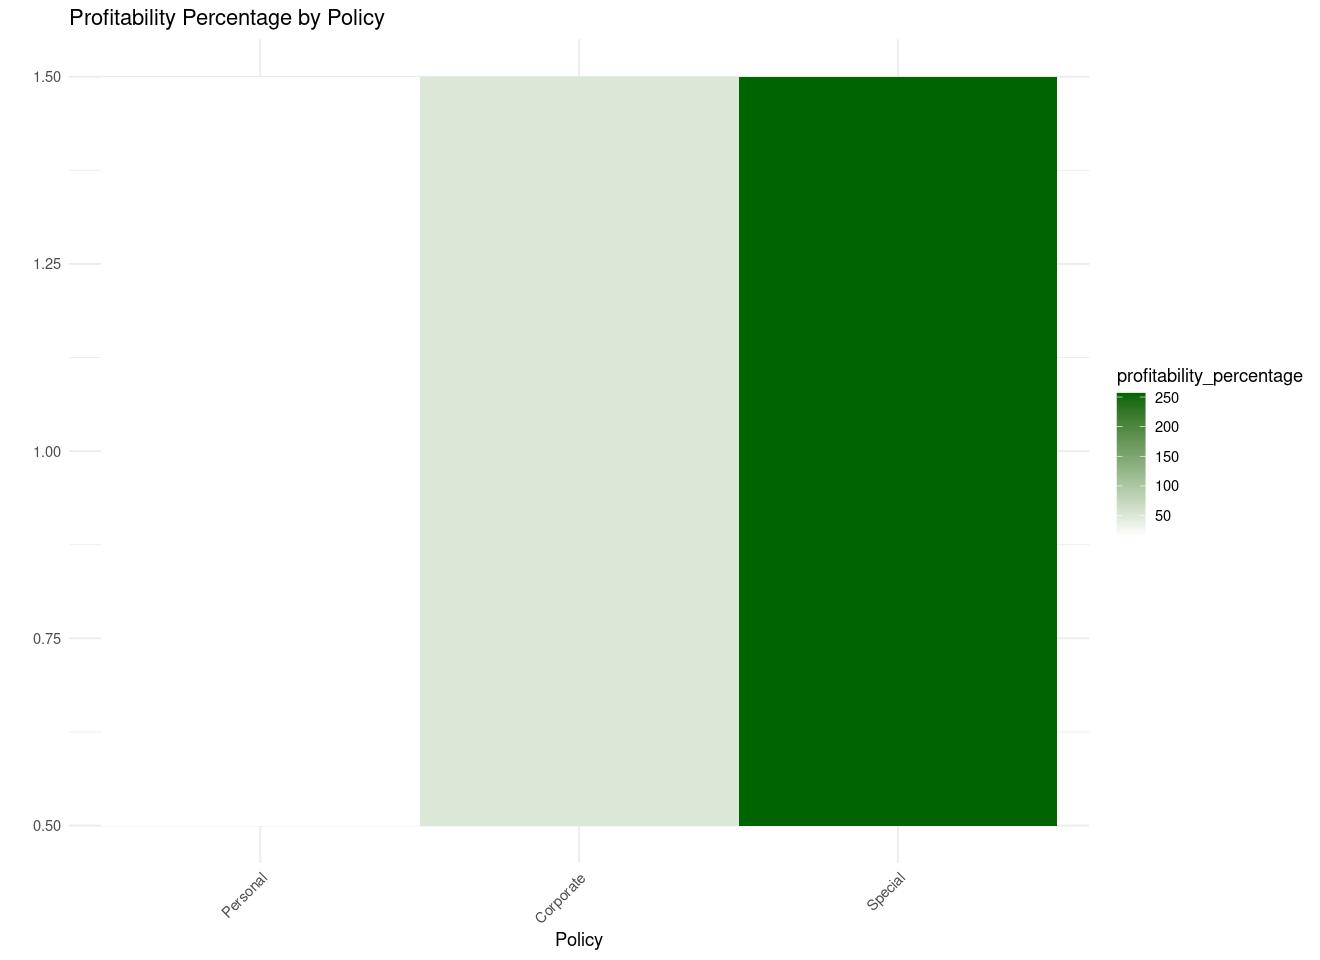

In [47]:
library(dplyr)
# Grouping by policy and calculating total claims and total revenue/income
claims_revenue <- claims_df %>%
                  group_by(policy) %>%
                  summarize(total_claims_amount = sum(total_claims_amount),
                            total_revenue = sum(current_claim_amount*total_claims),
						    total_claims = sum(total_claims))

# Calculating profitability
claims_revenue <- claims_revenue %>%
                  mutate(profitability = ((total_revenue - total_claims)/total_claims),
						profitability_percentage = ((profitability/total_claims)*100))

# View the summary dataframe
print(claims_revenue)

# Plot heatmap
ggplot(claims_revenue, aes(x = policy, y = 1, fill = profitability_percentage)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "darkgreen") +
  labs(title = "Profitability Percentage by Policy",
       x = "Policy",
       y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Question 3


**Question**:
Are there "problem customers" which have a large number of claims?


**Answer**:
It seems that based on the number of claims of the cutomer, people who have claimed twice have more claims as compared to other people who might have claimed more than twice. The histogram below depicts the same based on the number of claims with high claim amount. We might have to look into the customers who have the claim amounts of more than $2500 compared to others.

## Supporting Analysis


customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,⋯,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value,income_statement
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AG62140,California,Associate,Employed,Female,33716,Suburban,Married,Agent,Basic,⋯,Four-Door Car,Small,68,43,18,1337,4,3296,-372,Loss
AH53588,California,Associate,Retired,Male,26802,Suburban,Married,Agent,Basic,⋯,Two-Door Car,Midsize,66,26,7,1805,4,5606,-3890,Loss
AI58313,Nevada,Associate,Employed,Female,75425,Suburban,Divorced,Call Center,Basic,⋯,Sports Car,Midsize,116,42,25,1270,4,2851,2021,Profit
AJ32539,Oregon,Bachelor,Employed,Male,25860,Suburban,Married,Web,Basic,⋯,Four-Door Car,Midsize,72,28,12,2135,4,4313,-2297,Loss
AL46984,California,High School,Employed,Male,43259,Suburban,Married,Branch,Basic,⋯,Four-Door Car,Midsize,73,26,12,2144,4,4802,-2904,Loss
AM36670,California,Associate,Employed,Female,54827,Rural,Single,Branch,Basic,⋯,Four-Door Car,Large,64,31,17,1255,4,3571,-1587,Loss
AN57220,Oregon,Bachelor,Employed,Female,96917,Rural,Married,Web,Basic,⋯,Four-Door Car,Midsize,61,39,24,1504,4,4564,-2185,Loss
AO77635,California,Associate,Employed,Female,28987,Rural,Married,Branch,Basic,⋯,SUV,Midsize,102,39,8,1148,4,3881,97,Profit
AQ91207,California,High School,Employed,Male,38667,Urban,Married,Branch,Basic,⋯,Four-Door Car,Midsize,63,22,9,1634,4,4394,-3008,Loss


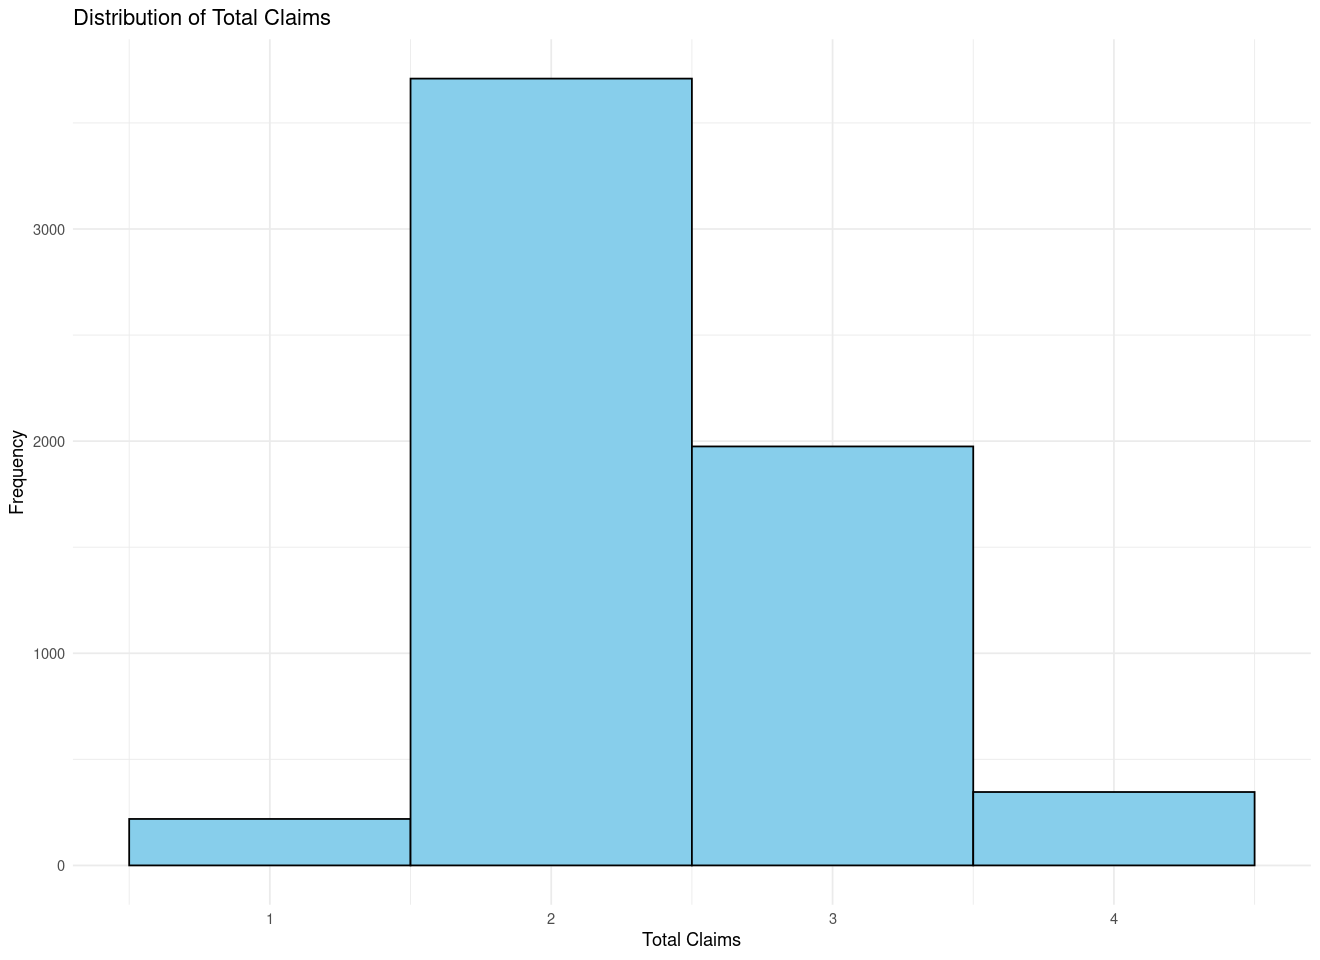

In [48]:
claims_summary <- claims_df %>%
  summarise(mean_total_claims = mean(total_claims),
            median_total_claims = median(total_claims),
            max_total_claims = max(total_claims))

# Visualize the distribution of total claims using a histogram
ggplot(claims_df, aes(x = total_claims)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Total Claims",
       x = "Total Claims",
       y = "Frequency") +
  theme_minimal()

# Identify potential problem customers with a large number of claims
threshold <- quantile(claims_df$total_claims, probs = 0.94) # Set threshold at the 95th percentile
problem_customers <- claims_df %>%
  filter(total_claims > threshold)

# View the identified problem customers
problem_customers

## Question 4


**Question**:
Are there states having the highest number of Claims?

**Answer**:
Here we can determine that maximum amount of claims are from the California state with 5185 claims which happens to be nearly 24.76% ~ 25% of the total claims. This also determines the comapny might have to give better deals in the california state, and might also give a negative impact on the california drivers.

## Supporting Analysis


# A tibble: 5 × 2
  customer_state total_claims
  <fct>                 <dbl>
1 California             5185
2 Oregon                 4203
3 Arizona                2794
4 Nevada                 1433
5 Washington             1331


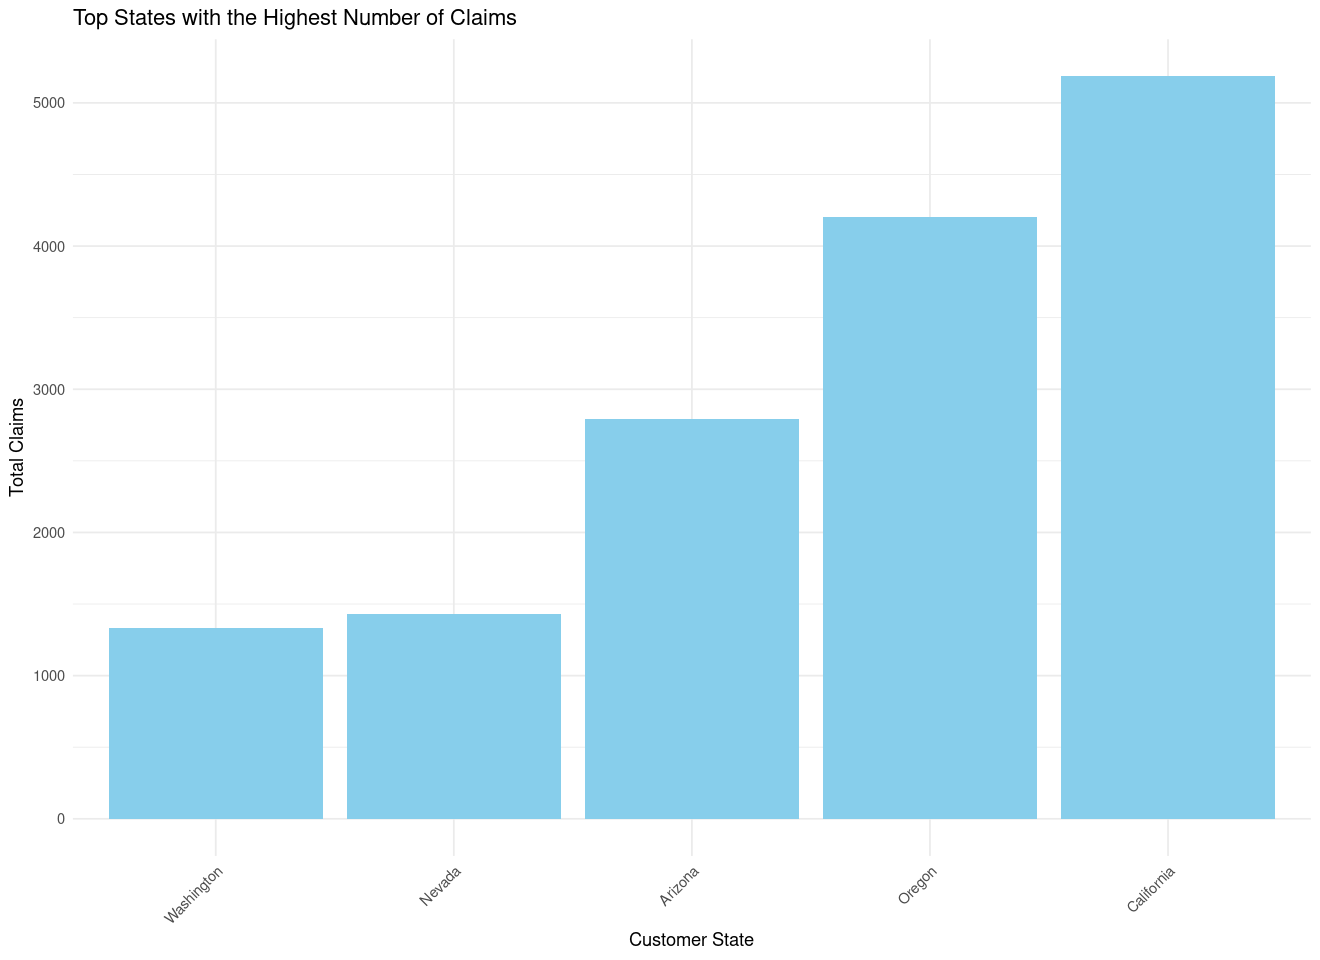

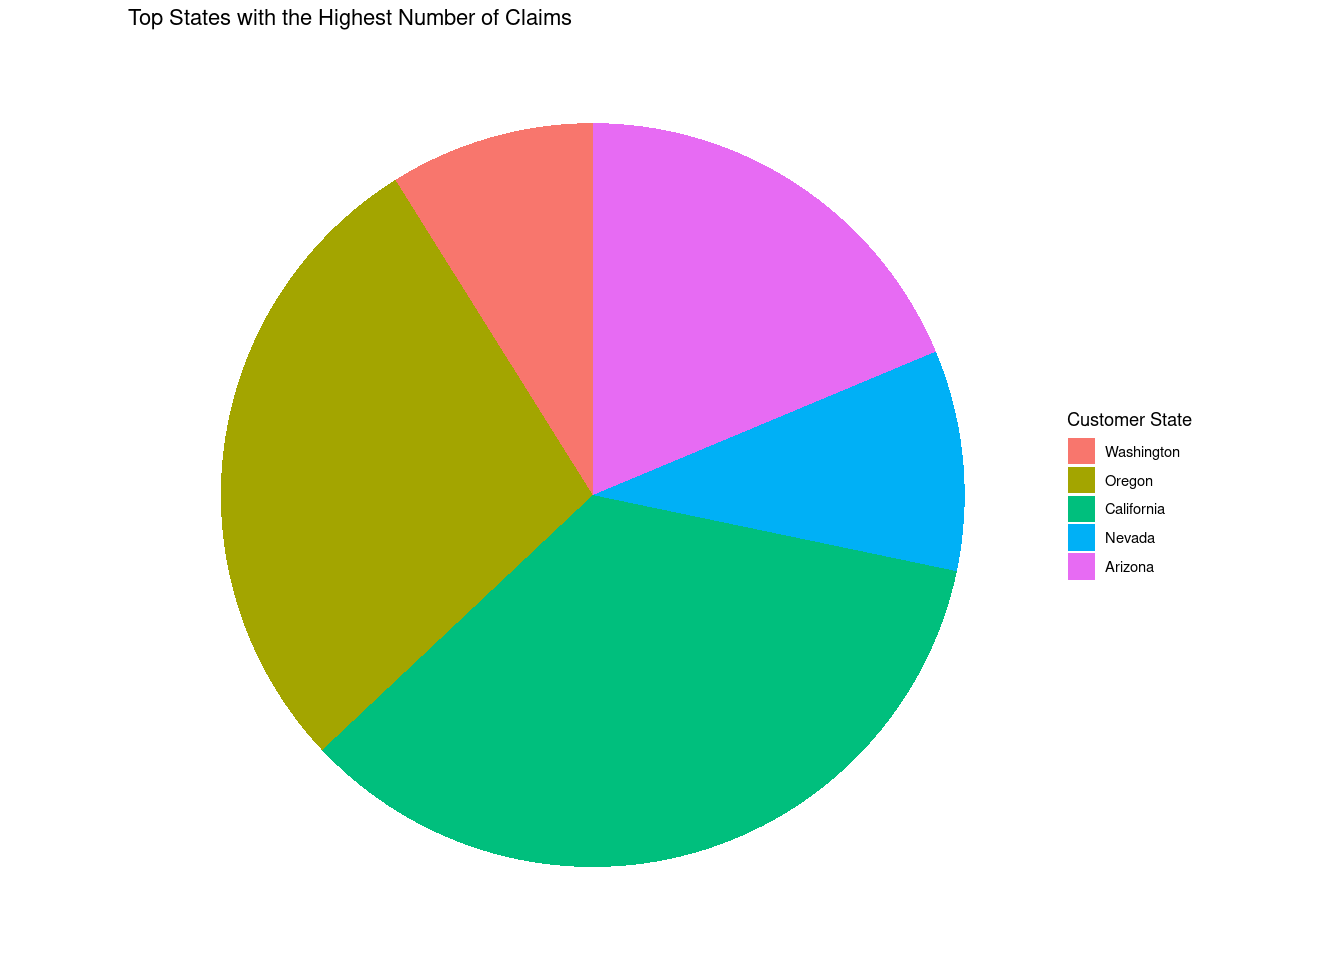

In [49]:
claims_by_state <- claims_df %>%
  group_by(customer_state) %>%
  summarise(total_claims = sum(total_claims))

# Sort the data by total claims in descending order
claims_by_state <- claims_by_state %>%
  arrange(desc(total_claims))

# View the states with the highest number of claims
top_states <- head(claims_by_state, 5)  # Adjust the number as needed
print(top_states)

library(ggplot2)

# Bar plot
ggplot(top_states, aes(x = reorder(customer_state, total_claims), y = total_claims)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Top States with the Highest Number of Claims",
       x = "Customer State",
       y = "Total Claims") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Pie chart
ggplot(top_states, aes(x = "", y = total_claims, fill = customer_state)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(title = "Top States with the Highest Number of Claims",
       x = NULL,
       y = NULL,
       fill = "Customer State") +
  theme_void()

## Question 5


**Question**:
How much percentage would the maritial status of the customers determine claims?

**Answer**:
It seems that maximum amount of claims are done by customers who belong to the "Married" category as compared to "Single" & "Divorced" with 66.7% of the claims. This would be one of the fields where the company might focus on the policy premium rates as compared to other classes of martial_status.


## Supporting Analysis


# A tibble: 3 × 3
  marital_status total_claims percentage_claims
  <fct>                 <dbl>             <dbl>
1 Single                 2429              16.3
2 Married                9967              66.7
3 Divorced               2550              17.1


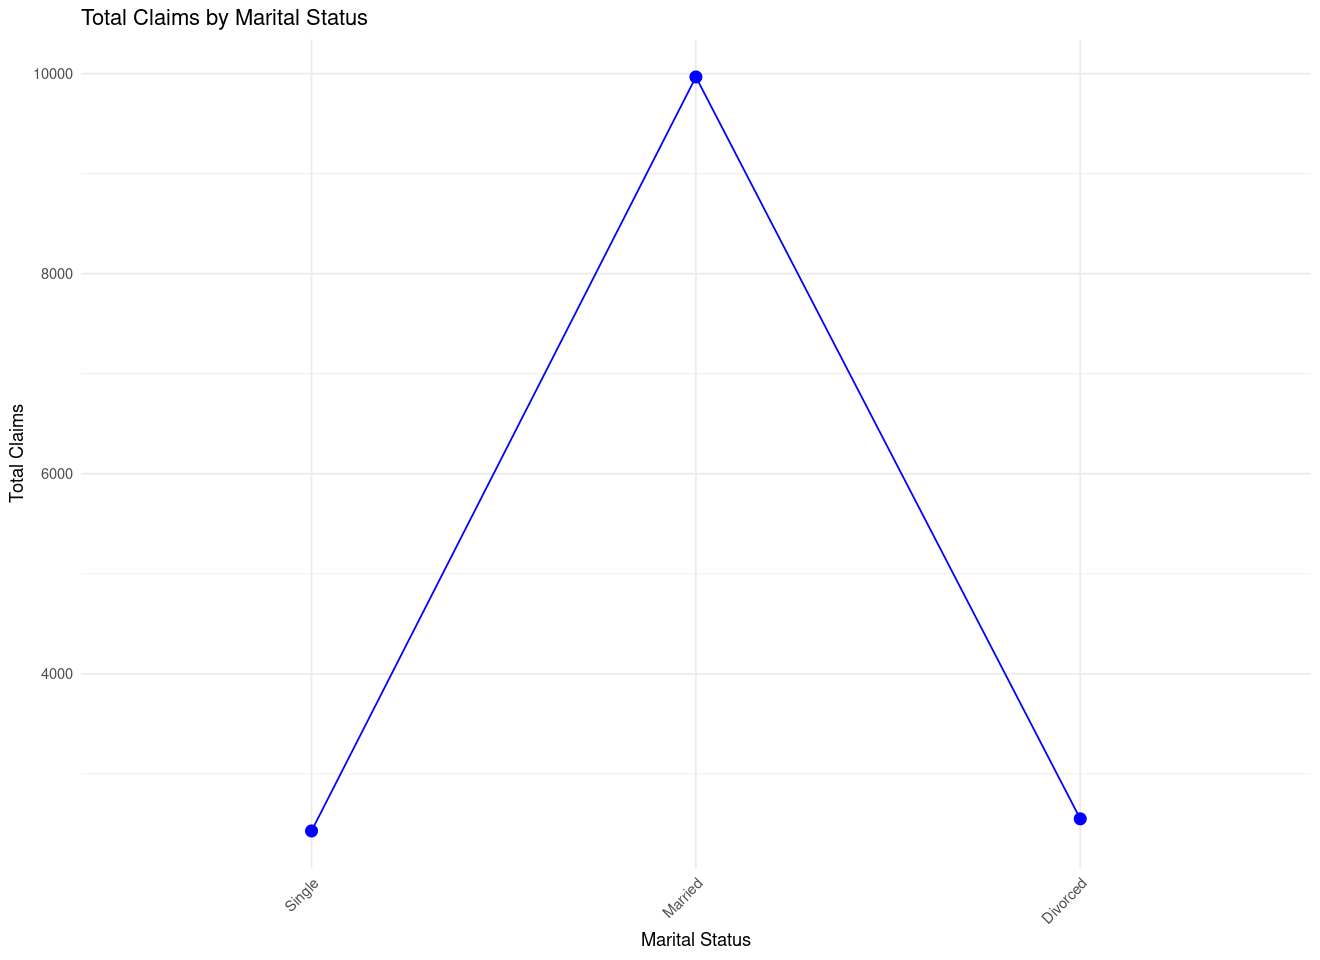

In [50]:
# Grouping by marital status and calculating total claims
claims_by_marital_status <- claims_df %>%
  group_by(marital_status) %>%
  summarise(total_claims = sum(total_claims))

# Calculate total number of claims overall
total_claims_overall <- sum(claims_by_marital_status$total_claims)

# Calculate percentage of claims for each marital status
claims_by_marital_status <- claims_by_marital_status %>%
  mutate(percentage_claims = (total_claims / total_claims_overall) * 100)

# Print the results
print(claims_by_marital_status)

# Plot a line graph
ggplot(claims_by_marital_status, aes(x = marital_status, y = total_claims, group = 1)) +
  geom_line(color = "blue") +
  geom_point(color = "blue", size = 3) +
  labs(title = "Total Claims by Marital Status",
       x = "Marital Status",
       y = "Total Claims") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Question 6


**Question**:
Is there a correlation between the length of policy tenure and CLV?


**Answer**:
Yes,There is actually a clear correlation between the policy tenure and the Customer Lifetime Value with 0.55 correlation. Which clearly states that increase in the policy tenure the value of the customer would be more positive.

## Supporting Analysis


correlation
<dbl>
0.551104


`geom_smooth()` using formula = 'y ~ x'


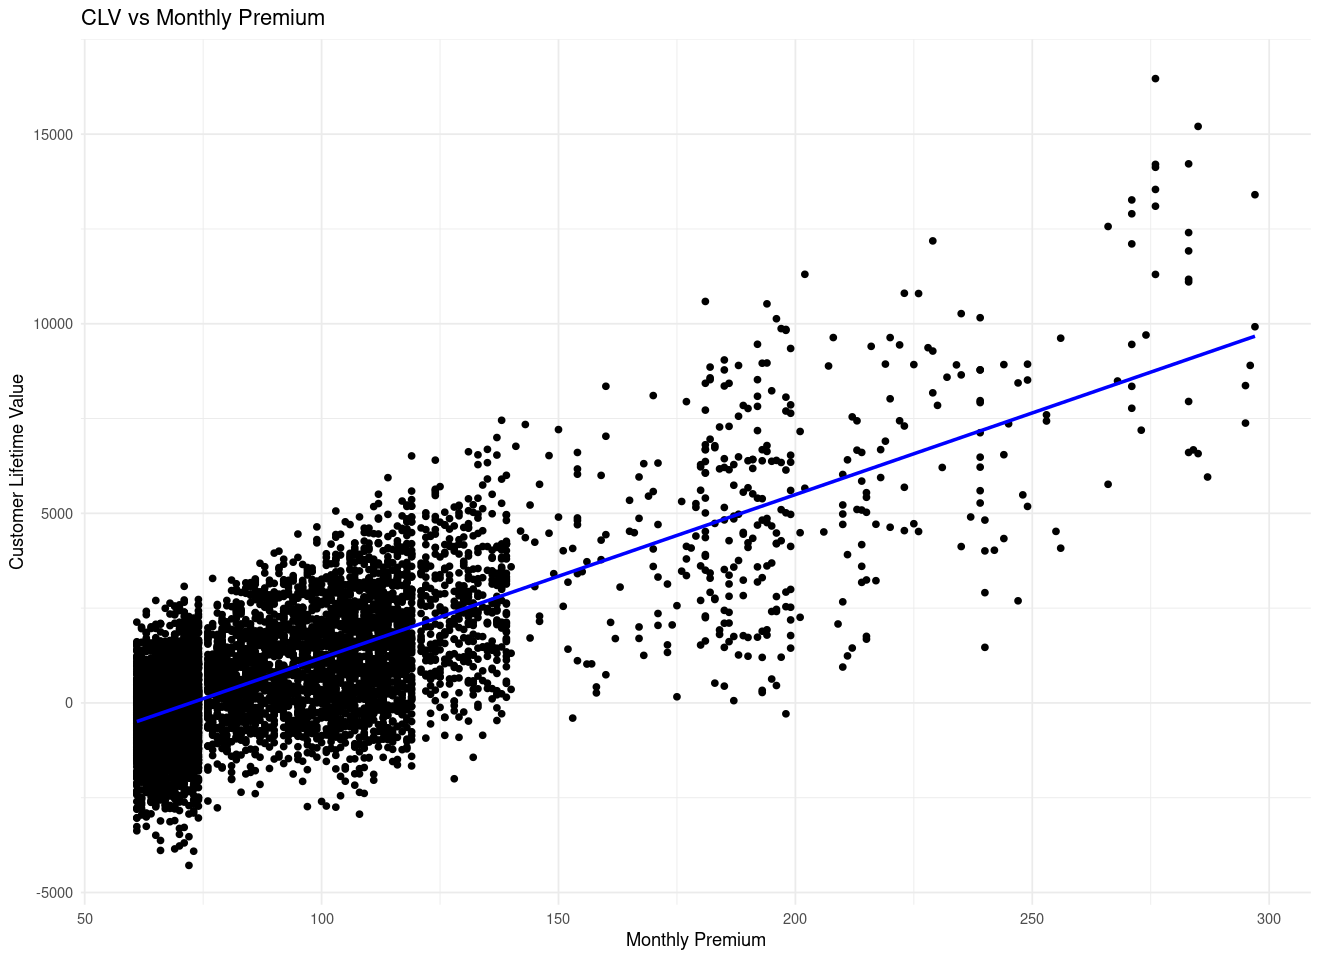

In [51]:
tenure_clv_correlation <- claims_df %>%
  summarise(correlation = cor(customer_lifetime_value, months_policy_active))

tenure_clv_correlation

ggplot(claims_df, aes(x = monthly_premium, y = customer_lifetime_value)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(x = "Monthly Premium", y = "Customer Lifetime Value", title = "CLV vs Monthly Premium") +
  theme_minimal()

## Question 7


**Question**:
Do customers who purchase luxury vehicles tend to make more claims compared to customers with economy vehicles?


**Answer**:
No, Customers who own Luxury cars don't tend to make more claims, as average number of claims are just 2.23 as compared to other customers who don't own them.

## Supporting Analysis


vehicle_class,avg_num_claims
<fct>,<dbl>
Two-Door Car,2.411765
Four-Door Car,2.387644
Sports Car,2.400000
SUV,2.400482
Luxury Car,2.344538
Luxury SUV,2.233083


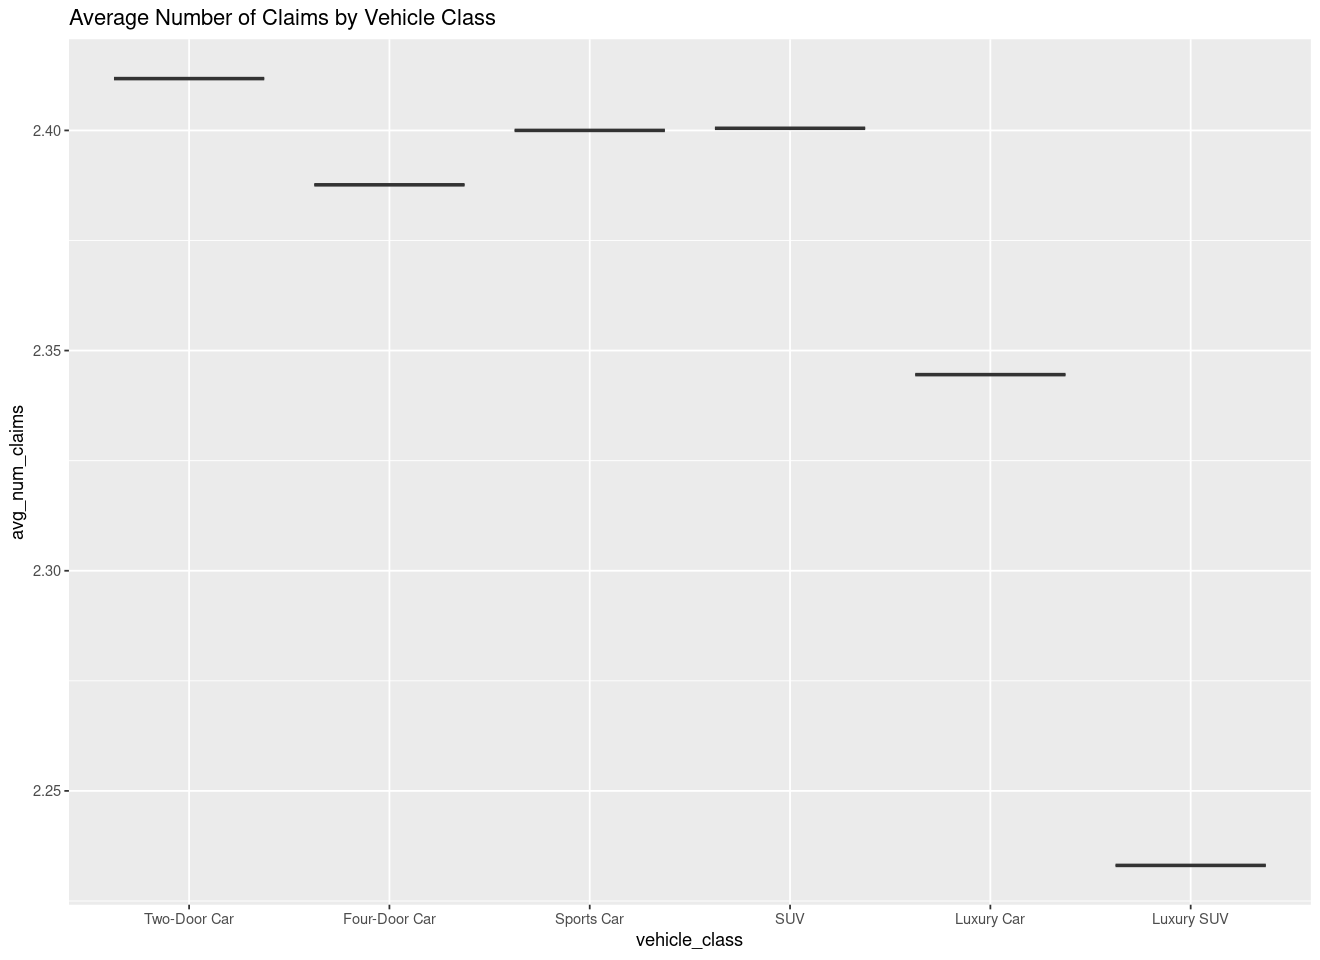

In [52]:
average_claims_by_vehicle_class <- claims_df %>%
  group_by(vehicle_class) %>%
  summarise(avg_num_claims = mean(total_claims))

average_claims_by_vehicle_class

ggplot(data = average_claims_by_vehicle_class, aes(x = vehicle_class, y = avg_num_claims)) +
  geom_boxplot() +  # Use geom_boxplot() instead of geom_bar()
  labs(title = "Average Number of Claims by Vehicle Class")


## Question 8


**Question**:
Does the Demographics of Education and Gender determine the profitability ?


**Answer**:
There is a clear indication that Male customers who hold a Asociate degree are highly profitable as compared to customers with other degress.

## Supporting Analysis


highest_education,gender,avg_profit_margin
<fct>,<fct>,<dbl>
High School,Female,0.6373935
High School,Male,-0.3791213
Associate,Female,-6.1141123
Associate,Male,8.4352138
Bachelor,Female,1.9453667
Bachelor,Male,1.4912796
Master,Female,-Inf
Master,Male,-10.4819916
Doctoral,Female,-Inf


Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


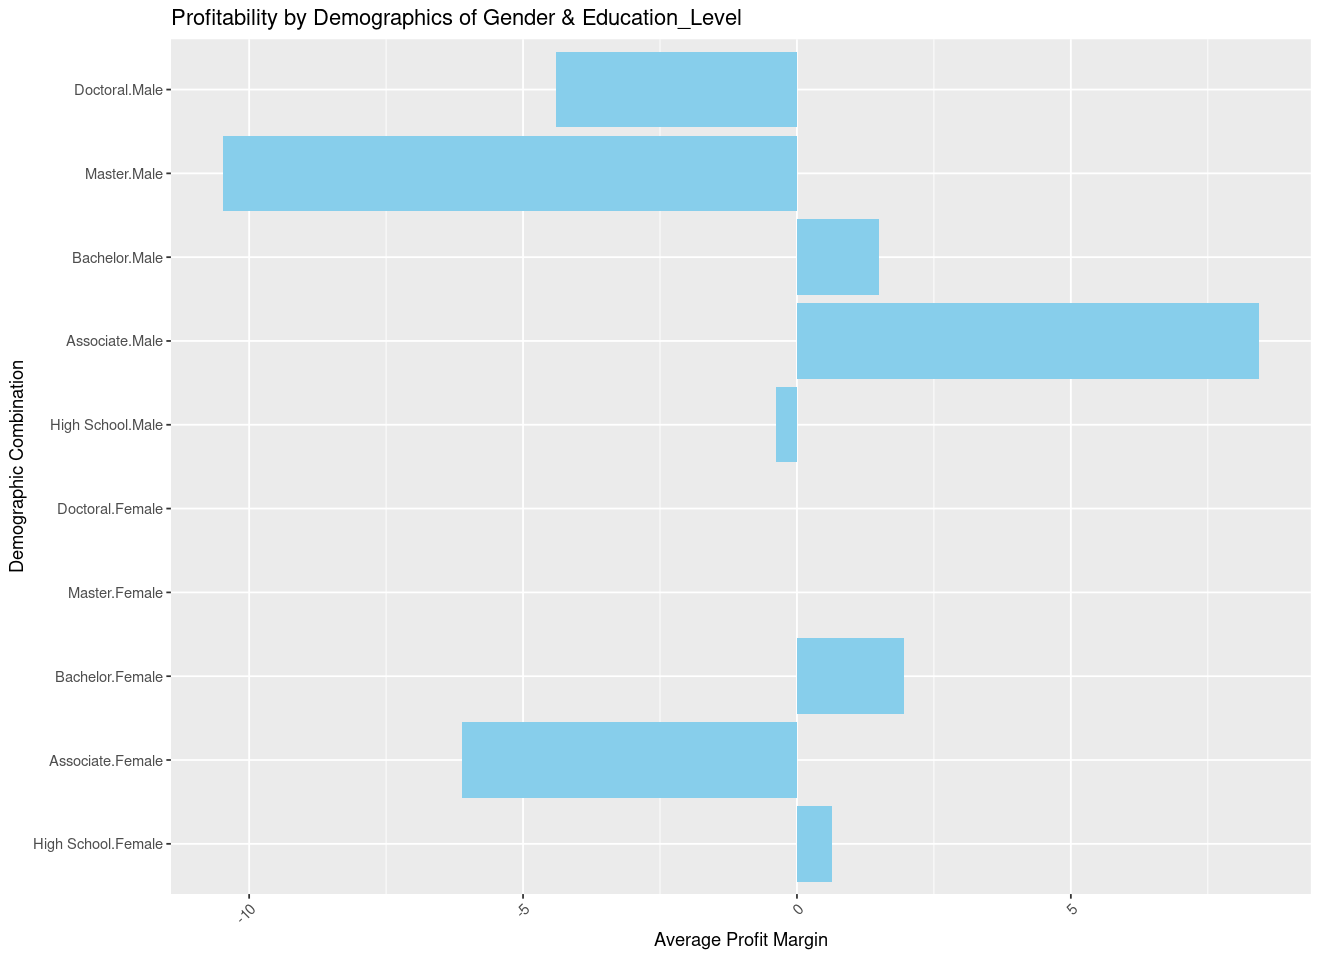

In [53]:
# Load necessary libraries
library(dplyr)
library(ggplot2)

# Assuming your data is stored in a dataframe named 'claims_df'

# Calculate profitability metrics
claims_df <- claims_df %>%
  mutate(profit_margin = (customer_lifetime_value - total_claims_amount) / customer_lifetime_value)

# Explore profitability by demographics
profitability_by_demographics <- claims_df %>%
  group_by(highest_education, gender) %>%
  summarise(avg_profit_margin = mean(profit_margin), .groups = "drop")

profitability_by_demographics

# Arrange the data by profit margin in descending order to identify highly profitable demographics
highly_profitable_demographics <- profitability_by_demographics %>%
  arrange(desc(avg_profit_margin))

# Plot the profitability by demographics
ggplot(data = highly_profitable_demographics, aes(x = interaction(highest_education, gender), y = avg_profit_margin)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Profitability by Demographics of Gender & Education_Level",
       x = "Demographic Combination",
       y = "Average Profit Margin") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_flip()


# Executive Summary (20 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

<br>

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

<br>

3.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add you executive summary in the text block below**.

## Introduction
The insurance company is concentrating honing it's price approach to gurantee optimal profitability and rise client contentment. They seek to serve better and have prefrence to customize their auto insurance coverage by analyzing patterns of customer activity. This method gives the scope of data analysis to sport patterns and possbile areas of development, which would result in better decision-making. 

It is critical to adress these issues for the continued growth of business. By resolving these issues the business can acheive better performance and long-term stability and profitability. They must also conenctrate on the morale of the comany in the eyes of the customers. Having a proactive approach in soling these problems is necessary to adjust to shifting customer demands and industry trends in order to remain competitive in the fast paced market.

The aim of this analysis is to identify the crucial variables that distinguish customers with high lifetime values from those who are burdening the organization with expenses that outweigh the monthly premium income conributions. By applying the required Expolatory Data Analysis methods, we aim to answer relevant quesitons in order to provide useful information to effectively direct strategies. The major goal would be to enable the business to enhance client lifetime value and overall profitability by optimizing it's resources and customizing its offers


## Key Findings
Post the EDA we found out the major analysis that lies below:
- Profitability by Type of Policy: Based on analysis, it was shown that clients with corporate ploicies are the most profitable, closely followed by clients with personal and special policies. Based on this finding, the insurance may be able to boost its overall profitability by providing targeted incentives or adjusting price structures that are specificially designed for corporate policyholders.
- Impact of policy and Claims:It's interesting to note that personal policyholders make the most financial contribution to the company, despite special policyholders often filing the fewest claims. This observation highlights the possible efficacy of implementing changes to policy features or premiums aimed at individual policyholders. Such modifications may result in a decrease in the number of claims and, as a consequence, improve the company's overall profitability.
- Determination of "Problem Customers": A more thorough investigationrevealed that consumers with two or more claims tend to have higher claim rates overall. As a result, putting in place tailored pricing plans and focused risk assessment techniques geared towards the particular customer base may assit reduce possible losses and raise the insurance company's overall profitability.
- Geographical Analysis: After doing a comprehensive geographical analysis, it was found that California has the highest number of claims, which presents the insurance firm with both oppurtunities and risks. This realization emphasizes how crucial it is to take regional dynamics into account when modifying pricing elements in order to maximize profitability across a range of markets.
- Impact on Demographics: It was discovered that, surprisilingly, married clients made the most claims. This research implies that the insurance firm may be able to maximize revenue and improve customer retention by customizing marketing methods or creating policy products that are specifically geared towards varying martial statuses.
- Customer lifetime value (CLV) and policy tenure were shown to be correlated in an interesting way, showing that customers with longer tenures typically have higher CLVs. This emphasizes how crucialit is for the insurance firm to prioritize customer retention measures in order to gradually increase profitability.
- Effect of Vehicle Class on Claim: In contrast to what one may initially believe, consumers who drive luxury cars do not always file noticeably more claims that those who drive economy cars. This implies that in order to guarantee the insurance company's maximum profitability, it would be necessary to review the rates or coverage alternatives for various car classes.
- Demographics and Profitability: Additional research showed that male clients with associate degrees are more profitable than clients in other demographics categories. This emphasizes how crucial it is to use targeted marketing and pricing techniques together with client segmentation based on demographics in order to efiiciently maximize profits for the insurance firm. 

## Recommendations
Based on the major Findings we could detrmine that the company can follow these recommendations in order to gain more
-Target Corporate Policyholders: Based on their size, industry, or certain risk factors, provide corporate policyholders-such as companies or organizations with specialized incentives or discounts. By offering value added services or coverage alternatives that complement their business operations, the insurance firm can boost profits by getting to know the specific demands and risks of corporate clients.
- Personal Policy Adjustments: To find chances to change policy features or premiusms, thoroughly analyze the risk profiles, claims histories, and demographics of individual policyholders. This can entail providing policyholders with a history of few claims with discounts or changing coverage options to better suit their needs while preserving profitability.
- Customer Risk Assesment: To identify clients whoi are more likely to file repeated claims, use sophisticated risk assesment approaches, such as data analytics and predictive modeling. The business can reduce losses and boost overall profitability by proactively managing risk through focused interventions like prevention measures or customized risk mitigation techniques.
- Georgraphical Pricing Strategies: Create dynamic pricing models that take market dynamics, legal constraints, and risk exposure variances by location into consideration. Customers who live in high-risk locations, such as those with high rates of vehicle theft or accidents, or those prone to natural catastrophes, may need to have their premiums or coverage options adjusted.
- Customer Retention Initiatives: To increase customer lifetime value(CLV) and cultivate enduring relationships with policyholders, use focused retention tactics. This could involve proactive outreach, loyalty plans, or tailored communications to address clients concerns and reaffirm the benefits of the insurance products.
- Pricing for Vehicle Classes: Examine market trends and claims data to create pricing plans that take into account the various risk profiles of various vehicle classes, including as sedans, SUVs, and luxury cars. The business can maximize profitability and mantain its competivitiveness in thge auto insurance industry by modifying rates appropriately and providing incentives for safer driving practices or vehicle security measures.
- Demographic Segmentation: To customize product offerings and pricing tactics, divide up your consumer base according to demographic attributes like age, income, occupation, and lifestyle preferences. The business can increase profitability, enhance customer satification, and maximize marketing efforts by knowing the particular requirements and preferences of various consumer segements.

Putting these suggestions into practice improves the company's overall competitiveness and market position in addition to increasing profitability. the organization may optimize pricing strategies, streamline process, improve underwriting accuracy, and improve risk management methods by efficiently harnessing data-driven insights. this ultimately results in fewer and milder claims, which lessens financial losses and enhances underwritting effectiveness. Additionally, the business can strengthen its relationships with policyholders and increase customer loyalty., positive word-of-mouth referrals, and sustained long-term growth in market share and profitability by concetrating on customer retention initiatives and providing personalized experiences.
